In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

RANDOM_STATE = 55

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
cat_variables = ['Sex' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope' , 'ChestPainType']
df = pd.get_dummies(data = df,
                    prefix = cat_variables,
                    columns = cat_variables)
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,RestingECG_LVH,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,172,0.0,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,49,160,180,0,156,1.0,1,True,False,False,...,False,True,False,False,True,False,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,True,True,False,False,False,True,False,True,False,False
3,48,138,214,0,108,1.5,1,True,False,False,...,False,False,True,False,True,False,True,False,False,False
4,54,150,195,0,122,0.0,0,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [6]:
features = [x for x in df.columns if x != 'HeartDisease']
print(len(features))

20


In [7]:
x_train,x_test,y_train,y_test = train_test_split(df[features],df['HeartDisease'],test_size=0.20,random_state=RANDOM_STATE)

print(f'train samples: {len(x_train)}')
print(f'validation samples: {len(x_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}') 

train samples: 734
validation samples: 184
target proportion: 0.5518


One additional hyperparameter for Random Forest is called n_estimators which is the number of Decision Trees that make up the Random Forest.

Remember that for a Random Forest, we randomly choose a subset of the features AND randomly choose a subset of the training examples to train each individual tree.

Following the lectures, if 𝑛
is the number of features, we will randomly select √n
of these features to train each individual tree.
Note that you can modify this by setting the max_features parameter.

You can also speed up your training jobs with another parameter, n_jobs.

Since the fitting of each tree is independent of each other, it is possible fit more than one tree in parallel.
So setting n_jobs higher will increase how many CPU cores it will use. Note that the numbers very close to the maximum cores of your CPU may impact on the overall performance of your PC and even lead to freezes.    Changing this parameter does not impact on the final result but can reduce the training time.

We will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100.

In [13]:
min_samples_split_list = [2,10,30,50,100,200,300,700]
max_depth_list = [2,4,8,16,32,64,None]
n_estimators_list = [10,50,100,500]

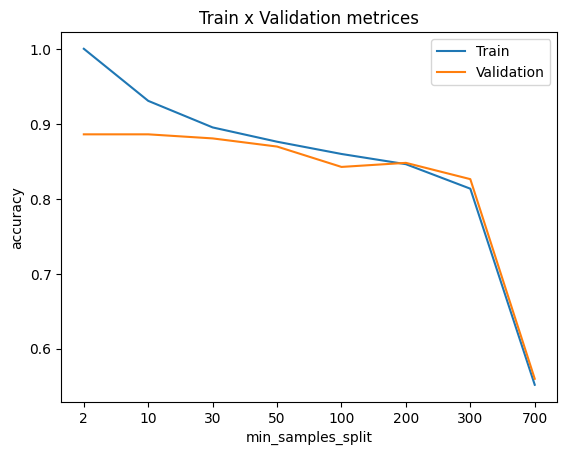

In [16]:
accuracy_list_train = []
accuracy_list_test = []

for min_sample_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_sample_split,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)

    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrices')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)),labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train' , 'Validation'])

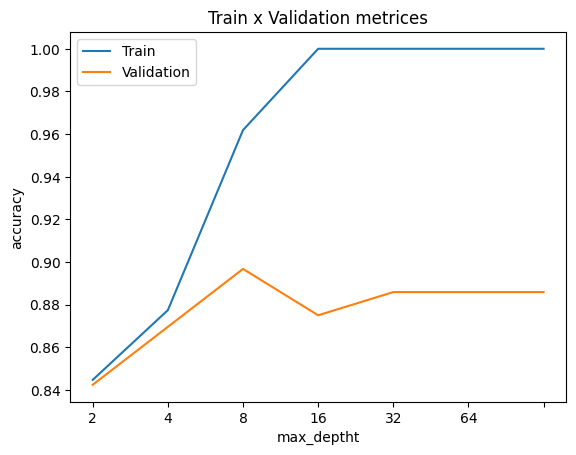

In [17]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)

    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrices')
plt.xlabel('max_deptht')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels = max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train' , 'Validation'])

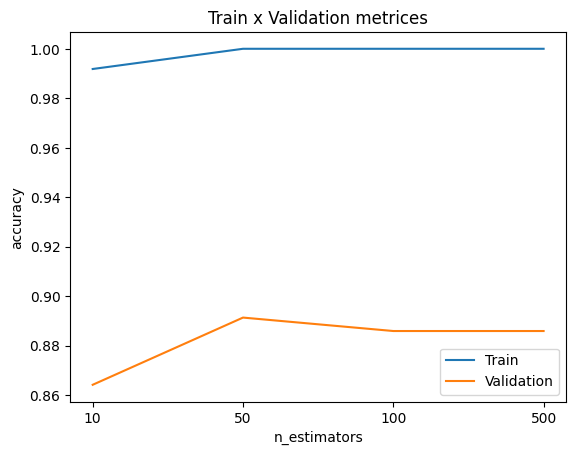

In [12]:
accuracy_list_train = []
accuracy_list_test = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,random_state=RANDOM_STATE)
    model.fit(x_train,y_train)

    predictions_train = model.predict(x_train)
    predictions_test = model.predict(x_test)
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrices')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)),labels = n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train' , 'Validation'])

In [28]:
random_model = RandomForestClassifier(min_samples_split=10,max_depth=32,n_estimators=100,max_features='sqrt',n_jobs=1,random_state=RANDOM_STATE)
random_model.fit(x_train,y_train)

print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_model.predict(x_train),y_train):.4f}")
print(f"Metrics validation:\n\tAccuracy score: {accuracy_score(random_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9305
Metrics validation:
	Accuracy score: 0.8859
